In [45]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

In [46]:
# Audio Data Augmentations for Waveform (Time Domain)
PATH="0b56bcfe_nohash_0.wav"
original_audio, sample_rate = librosa.load(PATH)

In [47]:
print(sample_rate)

22050


In [48]:
import os
print(os.getcwd())


F:\Audio_classification\notebooks


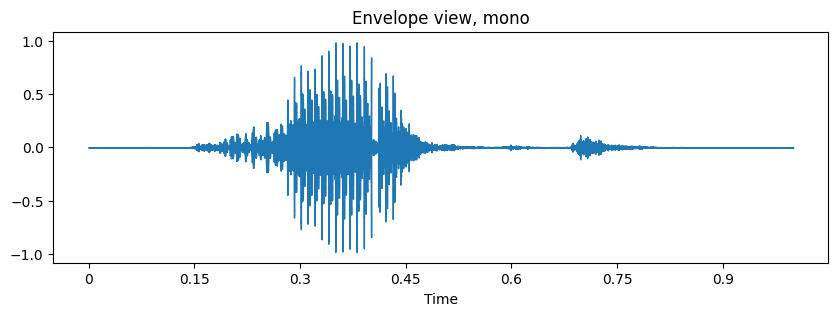

In [49]:
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(original_audio, sr=sample_rate, ax=ax)
ax.set_title(label='Envelope view, mono')
ax.label_outer()

In [50]:
print(sample_rate)

22050


In [51]:
import soundfile as sf

In [52]:
# White Noise
noise_factor = 0.05
white_noise = np.random.randn(len(original_audio)) * noise_factor
augmented_audio = original_audio + white_noise

In [53]:
sf.write("augmented.wav",augmented_audio,sample_rate)

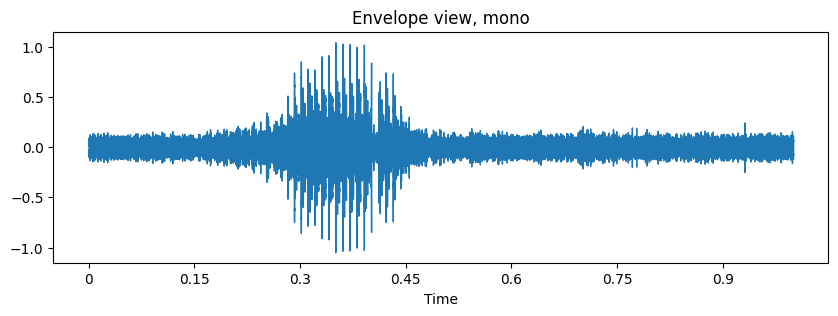

In [54]:
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(augmented_audio, sr=sample_rate, ax=ax)
ax.set_title(label='Envelope view, mono')
ax.label_outer()

In [55]:
# Changing pitch
pitch_factor=1
pitch_audio = librosa.effects.pitch_shift(y=original_audio, sr=sample_rate, n_steps=pitch_factor)

In [56]:
augmented_audio = original_audio + pitch_audio

In [57]:
sf.write("augmented.wav",augmented_audio,sample_rate)

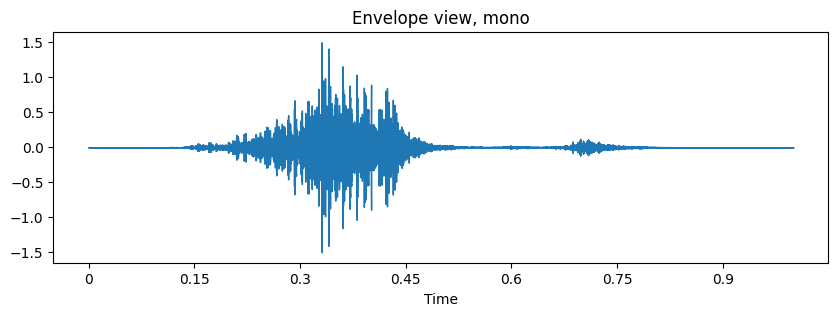

In [58]:
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(augmented_audio, sr=sample_rate, ax=ax)
ax.set_title(label='Envelope view, mono')
ax.label_outer()

In [59]:
print(sample_rate)

22050


In [60]:
# Time shift
shift_audio = np.roll(original_audio, 2000)

In [61]:
augmented_audio = original_audio + shift_audio

In [62]:
sf.write("augmented.wav",augmented_audio,sample_rate)

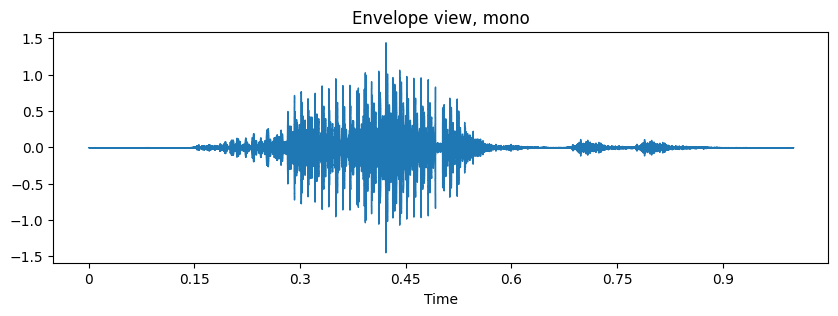

In [63]:
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(augmented_audio, sr=sample_rate, ax=ax)
ax.set_title(label='Envelope view, mono')
ax.label_outer()

In [64]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

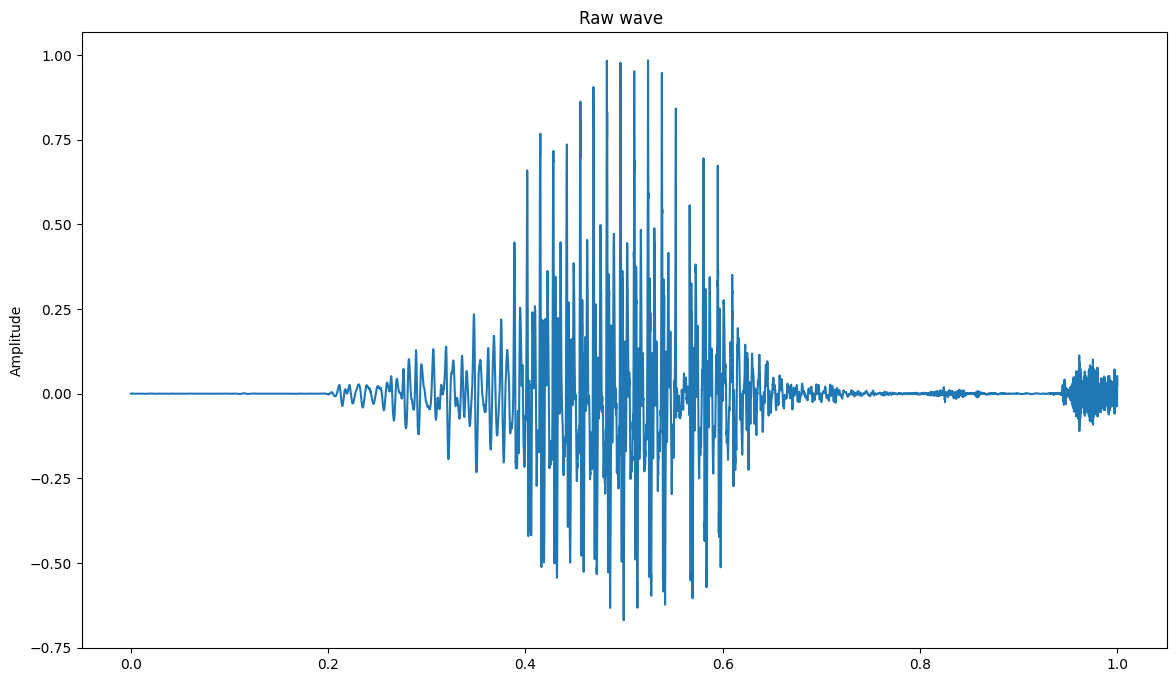

In [65]:
data = load_audio_file("0b56bcfe_nohash_0.wav")
plot_time_series(data)

This makes the sound deeper but we can still hear 'left' 


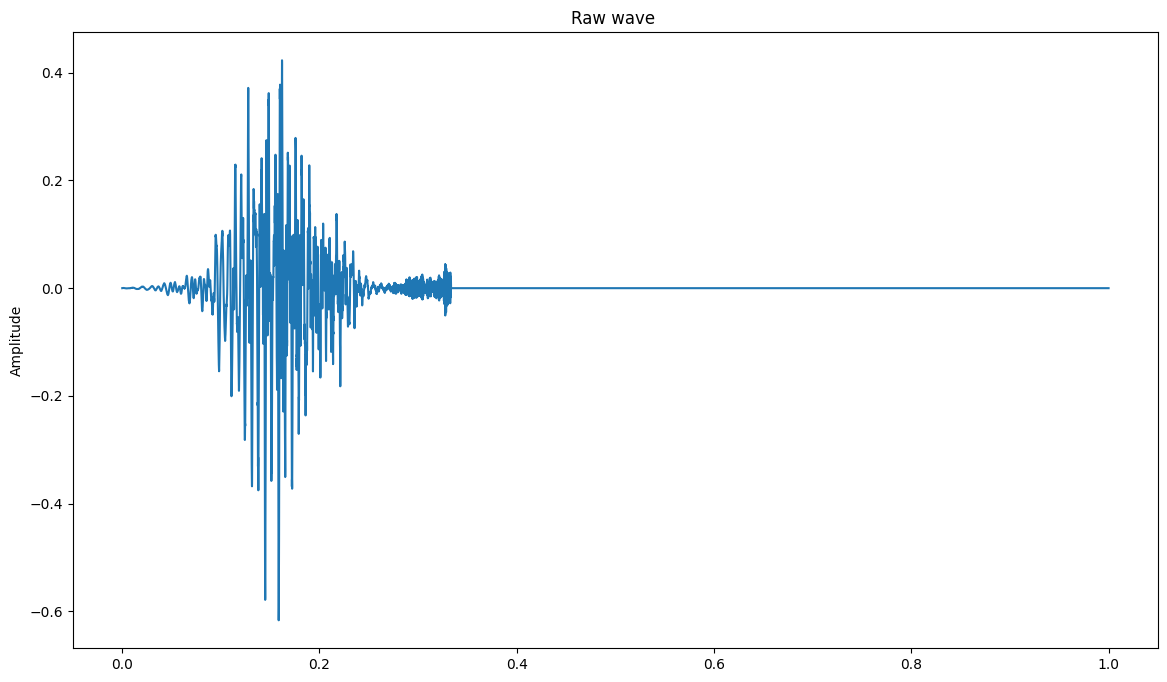

In [66]:
# stretching the sound
def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(y=data, rate=rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data


data_stretch =stretch(data, 3.0)
print("This makes the sound deeper but we can still hear 'left' ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

#data_stretch =stretch(data, 1.2)
#print("Higher frequencies  ")
#plot_time_series(data_stretch)
#ipd.Audio(data_stretch, rate=16000)

In [67]:
len(data)

16000

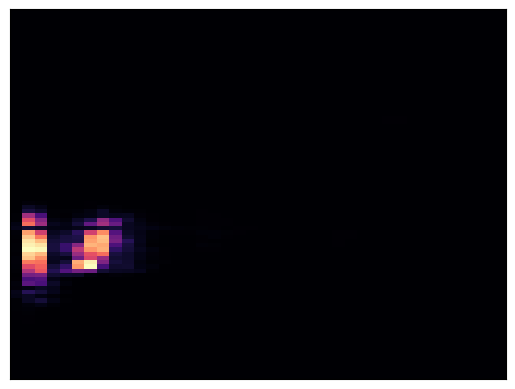

In [68]:
# Audio Data Augmentations for Spectrograms (Frequency Domain)
original_melspec = librosa.feature.melspectrogram(y = original_audio,
                                                  sr = sample_rate, 
                                                  n_fft = 512, 
                                                  hop_length = 256, 
                                                  n_mels = 40).T
librosa.display.specshow(original_melspec)


In [69]:
"""audio_from_mel = librosa.feature.inverse.mel_to_audio(
    M=original_melspec,
    sr=sample_rate,
    n_fft=2048,
    hop_length=512,
    win_length=2048
).T
ipd.Audio(audio_from_mel, rate=sample_rate)"""

'audio_from_mel = librosa.feature.inverse.mel_to_audio(\n    M=original_melspec,\n    sr=sample_rate,\n    n_fft=2048,\n    hop_length=512,\n    win_length=2048\n).T\nipd.Audio(audio_from_mel, rate=sample_rate)'

In [70]:
original_melspec = librosa.power_to_db(original_melspec)

In [71]:
"""melspec_from_db = librosa.db_to_power(original_melspec)

audio_from_pdb = librosa.feature.inverse.mel_to_audio(
    M=melspec_from_db,
    sr=sample_rate,
    n_fft=2048,
    hop_length=512,
)
ipd.Audio(audio_from_pdb, rate=sample_rate)"""

'melspec_from_db = librosa.db_to_power(original_melspec)\n\naudio_from_pdb = librosa.feature.inverse.mel_to_audio(\n    M=melspec_from_db,\n    sr=sample_rate,\n    n_fft=2048,\n    hop_length=512,\n)\nipd.Audio(audio_from_pdb, rate=sample_rate)'

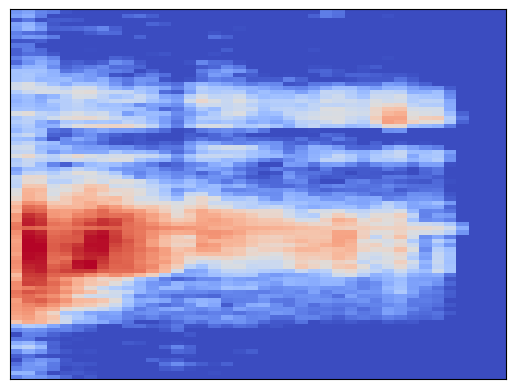

In [72]:
librosa.display.specshow(original_melspec)

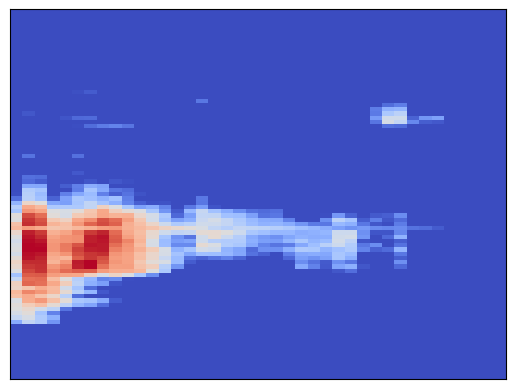

In [73]:
# Audio Data Augmentations for Spectrograms (Frequency Domain)
original_melspec = librosa.feature.melspectrogram(y = original_audio,
                                                  sr = sample_rate, 
                                                  n_fft = 512, 
                                                  hop_length = 256, 
                                                  n_mels = 40).T
original_melspec = librosa.amplitude_to_db(original_melspec)
librosa.display.specshow(original_melspec)

In [74]:
!pip install tensorflow_io

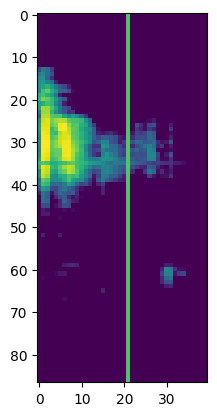

In [75]:
import tensorflow 
import tensorflow_io as tfio
freq_mask = tfio.audio.freq_mask(original_melspec, param=5)

plt.figure()
plt.imshow(freq_mask.numpy())

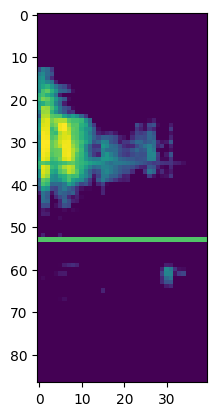

In [76]:
# Time masking
time_mask = tfio.audio.time_mask(original_melspec, param=5)

plt.figure()
plt.imshow(time_mask.numpy())

In [77]:
# original mel
mel = librosa.feature.melspectrogram(y=original_audio, sr=sample_rate)

# 1) Raw mel inversion
S1 = librosa.feature.inverse.mel_to_stft(mel, sr=sample_rate)
audio1 = librosa.griffinlim(S1)

# 2) power_to_db inversion
mel_pdb = librosa.power_to_db(mel)
mel_p = librosa.db_to_power(mel_pdb)
S2 = librosa.feature.inverse.mel_to_stft(mel_p, sr=sample_rate)
audio2 = librosa.griffinlim(S2)

# 3) amplitude_to_db inversion
mel_adb = librosa.amplitude_to_db(np.sqrt(mel))
mel_a = librosa.db_to_amplitude(mel_adb)
mel_p2 = mel_a**2
S3 = librosa.feature.inverse.mel_to_stft(mel_p2, sr=sample_rate)
audio3 = librosa.griffinlim(S3)

# Play
ipd.display(ipd.Audio(audio1, rate=sample_rate))
ipd.display(ipd.Audio(audio2, rate=sample_rate))
ipd.display(ipd.Audio(audio3, rate=sample_rate))
